## Meanshift Object Tracking

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Initialize webcam
cap = cv2.VideoCapture('images/walking.avi')

# take first frame of the video
ret, frame = cap.read()
print (type(frame))

# setup default location of window
r, h, c, w = 240, 100, 400, 160 
track_window = (c, r, w, h)

# Crop region of interest for tracking
roi = frame[r:r+h, c:c+w]

# Convert cropped window to HSV color space
hsv_roi =  cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

# Create a mask between the HSV bounds
lower_purple = np.array([10,0,0])
upper_purple = np.array([175,255,255])
mask = cv2.inRange(hsv_roi, lower_purple, upper_purple)

# Obtain the color histogram of the ROI
roi_hist = cv2.calcHist([hsv_roi], [0], mask, [180], [0,180])
plt.plot(roi_hist)

# Normalize values to lie between the range 0, 255
cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)
plt.plot(roi_hist)
# Setup the termination criteria
# We stop calculating the centroid shift after ten iterations 
# or if the centroid has moved at least 1 pixel
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

while True:
    
    # Read webcam frame
    ret, frame = cap.read()

    if ret == True:
        
        # Convert to HSV
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        
        # Calculate the histogram back projection 
        # Each pixel's value is it's probability
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)

        # apply meanshift to get the new location
        ret, track_window = cv2.meanShift(dst, track_window, term_crit)

        # Draw it on image
        x, y, w, h = track_window
        img2 = cv2.rectangle(frame, (x,y), (x+w, y+h), 255, 2)    

        cv2.imshow('Meansift Tracking', img2)
        
        if cv2.waitKey(1) == 13: #13 is the Enter Key
            break

    else:
        break

cv2.destroyAllWindows()
cap.release()

<class 'numpy.ndarray'>


In [11]:
term_crit

(3, 10, 1)

In [5]:
import matplotlib.pyplot as plt

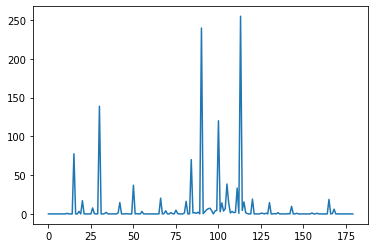

In [7]:
plt.plot(roi_hist)

### What are cv2.calcHist and cv2.calcBackProject?

**cv2.calcHist ** is simply a function calculates the color histograms for an array of images.

**calcBackProject** is a somewhat more complicated function, that calculates the histogram back projection.

In this case, the histogram back projection gives a probability estimate an image is equal to the image the original histogram was generated. 

Confused yet?

calcBackProject takes the histogram generated by calcHist and projects it back onto an image. The result is the probability that each pixel belongs to the image that originally generated the histogram.
